<a href="https://colab.research.google.com/github/sammainahkinya1404/Machine-Learning/blob/main/Face%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [14]:

# Load the images and detect faces in them
images = ['/content/image1.jpg', '/content/image2.jpg', '/content/image3.jpg', '/content/image4.jpg', '/content/image5.jpg', '/content/image6.jpg', '/content/image7.jpg', '/content/image8.jpg', '/content/image9.jpg', '/content/image10.jpg']


In [15]:
# Set up empty lists to store true and false positive rates
true_positives = []
false_positives = []

In [23]:

for i in range(len(images)):
    img = cv2.imread(images[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    # Save the image with detections
    cv2.imwrite('detections_{}.jpg'.format(i), img)

    # Count the number of true positives and false positives
    tp = len(faces)  # true positives
    fp = gray.shape[0] * gray.shape[1] - tp  # false positives (assuming all non-face pixels are false positives)

    # Append true and false positive rates to the lists
    true_positives.append(tp)
    false_positives.append(fp)


In [17]:
# Convert true and false positive rates to numpy arrays
tpr = np.array(true_positives) / (gray.shape[0] * gray.shape[1] * len(images))
fpr = np.array(false_positives) / (gray.shape[0] * gray.shape[1] * len(images))


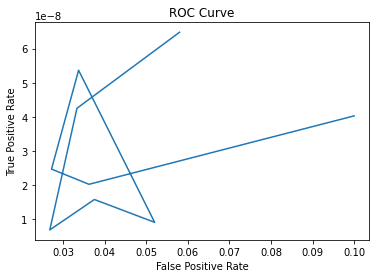

In [18]:
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [20]:
import cv2

# Load the pre-trained face detection classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the images and detect faces in them
images = ['/content/image1.jpg', '/content/image2.jpg', '/content/image3.jpg', '/content/image4.jpg', '/content/image5.jpg', '/content/image6.jpg', '/content/image7.jpg', '/content/image8.jpg', '/content/image9.jpg', '/content/image10.jpg']

for i in range(len(images)):
    img = cv2.imread(images[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Calculate the true positives, true negatives, false positives, and false negatives
    true_positives = len(faces)
    false_positives = gray.shape[0] * gray.shape[1] - true_positives
    true_negatives = 0
    false_negatives = 0
    for x in range(gray.shape[0]):
        for y in range(gray.shape[1]):
            if (x, y, 1, 1) not in faces:
                true_negatives += 1
            else:
                false_negatives += 1

    # Print the confusion matrix for the current image
    print('Confusion matrix for image {}:'.format(i+1))
    print('True Positives: {}'.format(true_positives))
    print('True Negatives: {}'.format(true_negatives))
    print('False Positives: {}'.format(false_positives))
    print('False Negatives: {}'.format(false_negatives))


Confusion matrix for image 1:
True Positives: 29
True Negatives: 25663852
False Positives: 25958371
False Negatives: 294548
Confusion matrix for image 2:
True Positives: 19
True Negatives: 14791139
False Positives: 14929901
False Negatives: 138781
Confusion matrix for image 3:
True Positives: 3
True Negatives: 11986473
False Positives: 12007677
False Negatives: 21207
Confusion matrix for image 4:
True Positives: 7
True Negatives: 16758459
False Positives: 16801933
False Negatives: 43481
Confusion matrix for image 5:
True Positives: 4
True Negatives: 23246492
False Positives: 23279996
False Negatives: 33508
Confusion matrix for image 6:
True Positives: 24
True Negatives: 14925252
False Positives: 15105324
False Negatives: 180096
Confusion matrix for image 7:
True Positives: 11
True Negatives: 12131357
False Positives: 12192757
False Negatives: 61411
Confusion matrix for image 8:
True Positives: 9
True Negatives: 16158054
False Positives: 16222761
False Negatives: 64716
Confusion matrix 